# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

### Import Statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [ ]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
df_data_shape = df_data.shape
r, c = df_data_shape
print(f"shape of data: {df_data_shape}")
print(f"rows: {r}")
print(f"columns: {c}")
print(f"column names: {sorted(df_data)}")
print(f"NaN values: {df_data.isnull().sum().any()}")
print(f"duplicates: {df_data.duplicated().values.any()}")

shape of data: (4324, 9)
rows: 4324
columns: 9
column names: ['Date', 'Detail', 'Location', 'Mission_Status', 'Organisation', 'Price', 'Rocket_Status', 'Unnamed: 0', 'Unnamed: 0.1']
NaN values: True
duplicates: False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [ ]:
df_data = df_data.dropna()

In [ ]:
print(f"NaN values: {df_data.isnull().sum().any()}")

NaN values: False


## Descriptive Statistics

In [27]:
print(f"description:{df_data.describe()}")

description:       Unnamed: 0.1  Unnamed: 0
count        964.00      964.00
mean         858.49      858.49
std          784.21      784.21
min            0.00        0.00
25%          324.75      324.75
50%          660.50      660.50
75%        1,112.00    1,112.00
max        4,020.00    4,020.00


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [37]:
launches_per_company = df_data['Organisation'].value_counts()

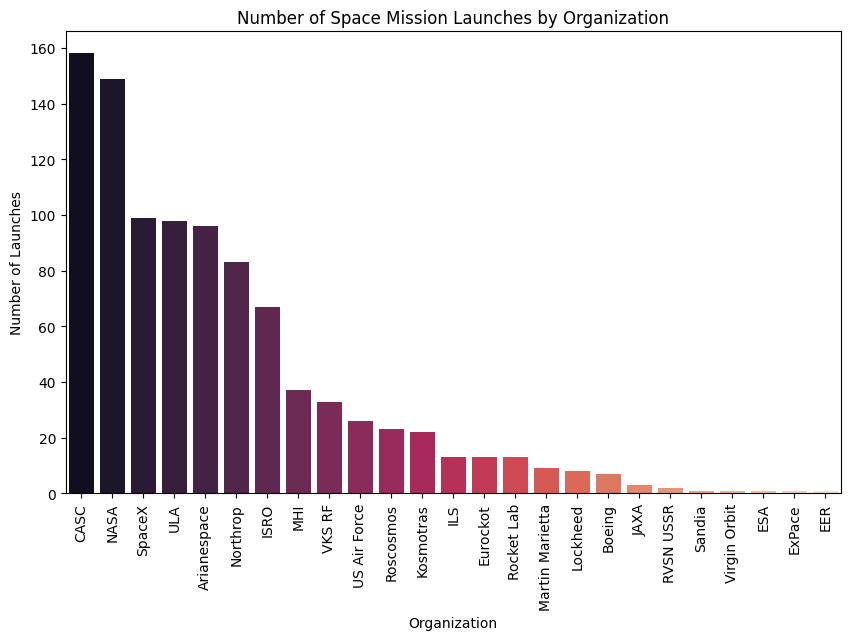

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=launches_per_company.index, hue=launches_per_company.index, y=launches_per_company.values, palette='rocket', legend=False)
plt.xticks(rotation=90)
plt.title('Number of Space Mission Launches by Organization')
plt.xlabel('Organization')
plt.ylabel('Number of Launches')
plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [60]:
rocket_status_counts = df_data['Rocket_Status'].value_counts()
print(f"Active Rockets: {rocket_status_counts.get('StatusActive')}")
print(f"Decommissioned Rockets: {rocket_status_counts.get('StatusRetired')}")

Active Rockets: 586
Decommissioned Rockets: 378


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [64]:
mission_status_counts = df_data['Mission_Status'].value_counts()
print(f"successful: {mission_status_counts.get('Success')}")
print(f"failed: {mission_status_counts.get('Failure')}")

successful: 910
failed: 36


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55],
 [Text(0, 0, '50.0'),
  Text(1, 0, '29.75'),
  Text(2, 0, '65.0'),
  Text(3, 0, '145.0'),
  Text(4, 0, '64.68'),
  Text(5, 0, '48.5'),
  Text(6, 0, '90.0'),
  Text(7, 0, '46.0'),
  Text(8, 0, '28.3'),
  Text(9, 0, '29.15'),
  Text(10, 0, '7.5'),
  Text(11, 0, '30.8'),
  Text(12, 0, '5.3'),
  Text(13, 0, '12.0'),
  Text(14, 0, '112.5'),
  Text(15, 0, '120.0'),
  Text(16, 0, '153.0'),
  Text(17, 0, '200.0'),
  Text(18, 0, '85.0'),
  Text(19, 0, '115.0'),
  Text(20, 0, '41.8'),
  Text(21, 0, '21.0'),
  Text(22, 0, '31.0'),
  Text(23, 0, '40.0'),
  Text(24, 0, '164.0'),
  Text(25, 0, '62.0'),
  Text(26, 0, '37.0'),
  Text(27, 0, '350.0'),
  Text(28, 0, '39.0'),
  Text(

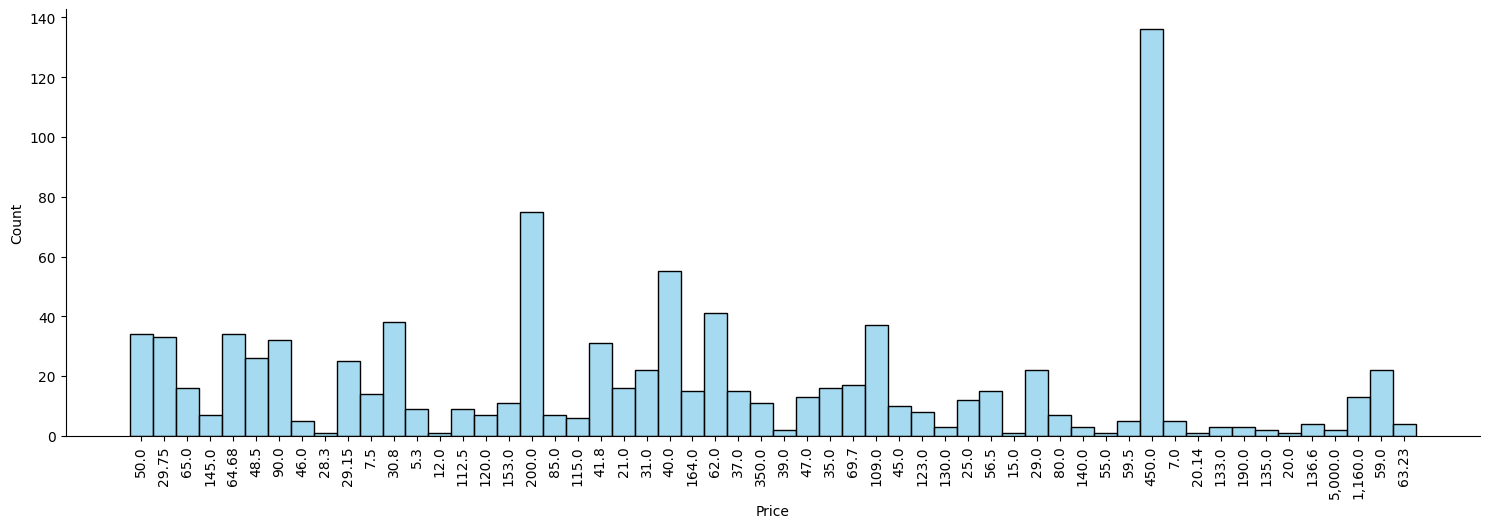

In [68]:
clean_df_price = df_data['Price'].dropna()
sns.displot(clean_df_price, color='skyblue', aspect=3)
plt.xticks(rotation=90)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [75]:
pd.options.mode.chained_assignment = None
country_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}
df_data['Country'] = df_data['Location'].apply(lambda loc: loc.split(",")[-1].strip())

df_data['Country'] = df_data['Country'].replace(country_mapping)
df_data['Country Code'] = df_data['Country'].apply(lambda x: countries.get(x).alpha3 if countries.get(x) else None)
launches_by_country = df_data.groupby('Country Code').size().reset_index(name='Number of Launches')

In [77]:
fig = px.choropleth(
    launches_by_country,
    locations='Country Code',
    locationmode='ISO-3',
    color='Number of Launches',
    color_continuous_scale=px.colors.sequential.matter,
    title="Number of Space launches by Country",
    scope='world'
)
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [83]:
failures_df = df_data[df_data['Mission_Status'] == 'Failure']
failures_by_country = failures_df.groupby('Country Code').size().reset_index(name='Number of Failures')

In [81]:
fig = px.choropleth(
    failures_by_country,
    locations='Country Code',
    locationmode='ISO-3',
    color='Number of Failures',
    color_continuous_scale=px.colors.sequential.matter,
    title="Number of Launch Failures by Country",
    scope='world'
)
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [85]:
fig = px.sunburst(
    df_data,
    path=['Country', 'Organisation', 'Mission_Status'],
    title='Sunburst Chart of Launches by Country, Organisation, and Mission Status',
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [88]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
total_spent_by_org = df_data.groupby('Organisation')['Price'].sum().reset_index()
total_spent_by_org.columns = ['Organisation', 'Total Amount Spent (USD Millions)']
total_spent_by_org = total_spent_by_org.sort_values(by='Total Amount Spent (USD Millions)', ascending=False)

In [89]:
fig = px.bar(
    total_spent_by_org,
    x='Organisation',
    y='Total Amount Spent (USD Millions)',
    title='Total Amount of Money Spent by Organisation on Space Missions',
    labels={'Total Amount Spent (USD Millions)': 'Total Amount Spent (USD Millions)', 'Organisation': 'Organisation'},
    text='Total Amount Spent (USD Millions)',
)
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [91]:
org_spending = df_data.groupby('Organisation').agg(
    Total_Spent=('Price', 'sum'),
    Launch_Count=('Price', 'count')
).reset_index()
org_spending['Average_Spent_Per_Launch'] = org_spending['Total_Spent'] / org_spending['Launch_Count']
org_spending.columns = ['Organisation', 'Total Amount Spent (USD Millions)', 'Number of Launches', 'Average Amount Spent Per Launch (USD Millions)']
org_spending = org_spending.sort_values(by='Average Amount Spent Per Launch (USD Millions)', ascending=False)


In [92]:
fig = px.bar(
    org_spending,
    x='Organisation',
    y='Average Amount Spent Per Launch (USD Millions)',
    title='Average Amount of Money Spent by Organisation per Launch',
    labels={'Average Amount Spent Per Launch (USD Millions)': 'Average Amount Spent Per Launch (USD Millions)', 'Organisation': 'Organisation'},
    text='Average Amount Spent Per Launch (USD Millions)',
)
fig.show()

# Chart the Number of Launches per Year

In [94]:
df_data['Date']= pd.to_datetime(df_data['Date'], errors='coerce')
df_data['Year'] = df_data['Date'].dt.year
launches_per_year = df_data.groupby('Year').size().reset_index(name='Number of Launches')

In [95]:
fig = px.line(
    launches_per_year,
    x='Year',
    y='Number of Launches',
    title='Number of Launches per Year',
    labels={'Number of Launches': 'Number of Launches', 'Year': 'Year'},
)
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [111]:
df_data['YearMonth'] = df_data['Date'].dt.to_period('M')
launches_per_month = df_data.groupby('YearMonth').size().reset_index(name='Number of Launches')
launches_per_month['YearMonth'] = launches_per_month['YearMonth'].astype(str)
launches_per_month['Rolling Average'] = launches_per_month['Number of Launches'].rolling(window=3).mean()


<ipython-input-111-1e6e76cc2660>:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [112]:
highest_launch_month = launches_per_month.loc[launches_per_month['Number of Launches'].idxmax()]
print(f"The month with the highest number of launches: {highest_launch_month['YearMonth']} with {highest_launch_month['Number of Launches']} launches.")


The month with the highest number of launches: 2017-06 with 12 launches.


In [113]:
fig = px.line(
    launches_per_month,
    x='YearMonth',
    y='Number of Launches',
    title='Number of Launches Month-on-Month with Rolling Average',
    labels={'Number of Launches': 'Number of Launches', 'YearMonth': 'Month'},
)
fig.add_scatter(x=launches_per_month['YearMonth'].astype(str), y=launches_per_month['Rolling Average'],
                 mode='lines', name='Rolling Average', line=dict(color='red', width=2, dash='dash'))
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [115]:
df_data['Month'] = df_data['Date'].dt.month
launches_per_month = df_data.groupby('Month').size().reset_index(name='Number of Launches')

In [116]:
fig = px.bar(
    launches_per_month,
    x='Month',
    y='Number of Launches',
    title='Number of Launches per Month',
    labels={'Number of Launches': 'Number of Launches', 'Month': 'Month'},
)
fig.update_xaxes(
    tickmode='array',
    tickvals=list(range(1, 13)),
    ticktext=['January', 'February', 'March', 'April', 'May', 'June',
              'July', 'August', 'September', 'October', 'November', 'December']
)
fig.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [ ]:
df_data = df_data.dropna(subset=['Price'])

In [117]:
average_price_per_year = df_data.groupby(df_data['Date'].dt.year)['Price'].mean().reset_index(name='Average Price')


In [118]:
fig = px.line(
    average_price_per_year,
    x='Date',
    y='Average Price',
    title='Average Launch Price Over Time',
    labels={'Average Price': 'Average Launch Price (USD Millions)', 'Date': 'Year'},
)
fig.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [119]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')
launches_per_organisation = df_data['Organisation'].value_counts().reset_index()
launches_per_organisation.columns = ['Organisation', 'Number of Launches']
top_10_organisations = launches_per_organisation.nlargest(10, 'Number of Launches')['Organisation']

In [120]:
filtered_df = df_data[df_data['Organisation'].isin(top_10_organisations)]
filtered_df['Year'] = filtered_df['Date'].dt.year
launches_per_year = filtered_df.groupby(['Year', 'Organisation']).size().reset_index(name='Launches')

In [121]:
years = filtered_df['Date'].dt.year.unique()
years.sort()
all_years = pd.DataFrame({'Year': years})
all_combinations = pd.MultiIndex.from_product([all_years['Year'], top_10_organisations], names=['Year', 'Organisation']).to_frame(index=False)
launches_by_year_org = filtered_df.groupby([filtered_df['Date'].dt.year, 'Organisation']).size().reset_index(name='Number of Launches')
pivot_df = launches_by_year_org.pivot(index='Date', columns='Organisation', values='Number of Launches').fillna(0)

In [122]:
fig = px.line(
    launches_by_year_org,
    x='Date',
    y='Number of Launches',
    color='Organisation',
    title='Number of Launches Over Time by Top 10 Organisations',
    labels={'Number of Launches': 'Number of Launches', 'Date': 'Year'},
)
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [123]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce').dt.tz_localize(None)

country_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'
}

df_data['Country'] = df_data['Location'].apply(lambda loc: loc.split(",")[-1].strip())
df_data['Country'] = df_data['Country'].replace(country_mapping)

def get_country_code(country_name):
    try:
        return countries.get(country_name).alpha3
    except KeyError:
        return None

df_data['Country_Code'] = df_data['Country'].apply(get_country_code)

In [124]:
cold_war_countries = ['USA', 'RUS', 'KAZ']
cold_war_start = 1947
cold_war_end = 1991
cold_war_df = df_data[
    (df_data['Country_Code'].isin(cold_war_countries)) &
    (df_data['Date'].dt.year >= cold_war_start) &
    (df_data['Date'].dt.year <= cold_war_end)
]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [125]:
df_data['Year'] = df_data['Date'].dt.year
yearly_launches = df_data.groupby(['Year', 'Country_Code']).size().reset_index(name='Total_Launches')

leading_countries = yearly_launches.loc[yearly_launches.groupby('Year')['Total_Launches'].idxmax()]

In [126]:
fig = px.bar(leading_countries,
             x='Year',
             y='Total_Launches',
             color='Country_Code',
             title='Leading Country by Total Number of Launches Year-on-Year (Up to 2020)',
             labels={'Total_Launches': 'Total Number of Launches', 'Year': 'Year'})

fig.show()


In [127]:
successful_missions = df_data[df_data['Mission_Status'] == 'Success']
yearly_successful_launches = successful_missions.groupby(['Year', 'Country_Code']).size().reset_index(name='Total_Successful_Launches')
leading_successful_countries = yearly_successful_launches.loc[yearly_successful_launches.groupby('Year')['Total_Successful_Launches'].idxmax()]

fig = px.bar(leading_successful_countries,
             x='Year',
             y='Total_Successful_Launches',
             color='Country_Code',
             title='Leading Country by Total Number of Successful Launches Year-on-Year (Up to 2020)',
             labels={'Total_Successful_Launches': 'Total Number of Successful Launches', 'Year': 'Year'})
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [128]:
yearly_launches = df_data.groupby(['Year', 'Organisation']).size().reset_index(name='Total_Launches')
dominant_organizations = yearly_launches.loc[yearly_launches.groupby('Year')['Total_Launches'].idxmax()]
fig = px.bar(dominant_organizations,
             x='Year',
             y='Total_Launches',
             color='Organisation',
             title='Dominant Organisation by Total Number of Launches Year-on-Year',
             labels={'Total_Launches': 'Total Number of Launches', 'Year': 'Year'})
fig.show()

In [129]:
dominant_70s = dominant_organizations[dominant_organizations['Year'].between(1970, 1979)]
dominant_80s = dominant_organizations[dominant_organizations['Year'].between(1980, 1989)]

dominant_organization_70s = dominant_70s['Organisation'].mode()[0] if not dominant_70s.empty else "No Data"
dominant_organization_80s = dominant_80s['Organisation'].mode()[0] if not dominant_80s.empty else "No Data"

print(f"\nDominant Organization in the 1970s: {dominant_organization_70s}")
print(f"Dominant Organization in the 1980s: {dominant_organization_80s}")


Dominant Organization in the 1970s: NASA
Dominant Organization in the 1980s: NASA


In [130]:
dominant_2018 = dominant_organizations[dominant_organizations['Year'] == 2018]
dominant_2019 = dominant_organizations[dominant_organizations['Year'] == 2019]
dominant_2020 = dominant_organizations[dominant_organizations['Year'] == 2020]

print(f"Dominant Organization in 2018: {dominant_2018['Organisation'].values[0] if not dominant_2018.empty else 'No Data'}")
print(f"Dominant Organization in 2019: {dominant_2019['Organisation'].values[0] if not dominant_2019.empty else 'No Data'}")
print(f"Dominant Organization in 2020: {dominant_2020['Organisation'].values[0] if not dominant_2020.empty else 'No Data'}")

Dominant Organization in 2018: CASC
Dominant Organization in 2019: CASC
Dominant Organization in 2020: CASC
